# Ch03 Neighborhood Approaches and DBSCAN

# Exercise 9: Evaluating the Impact of Neighborhood Radius Size

1. Generate some dummy data

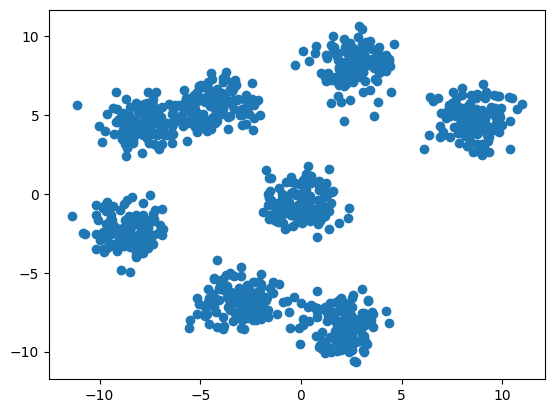

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

# Generate a random cluster dataset to experiment on. X = coordinate points, #y = cluster labels (not needed)
X, y = make_blobs(n_samples=1000, centers=8, n_features=2, random_state=800)

# Visualize the data
plt.scatter(X[:,0], X[:,1])
plt.show()

2. To implement DBSCAN using scikit-learn, you will need to instantiate a new scikit-learn class

In [2]:
db = DBSCAN(eps=0.5, min_samples=10, metric='euclidean')

3. set up a loop that allows us to explore potential neighborhood radius size options interactively:

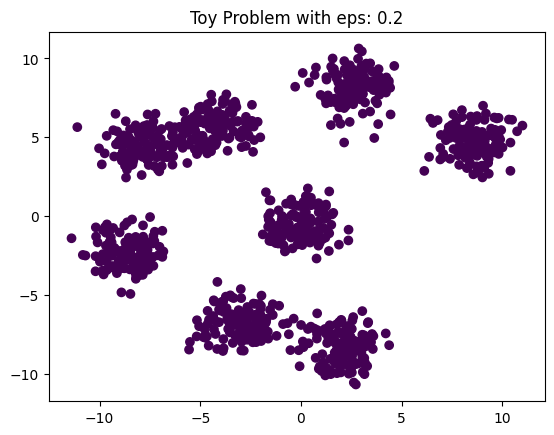

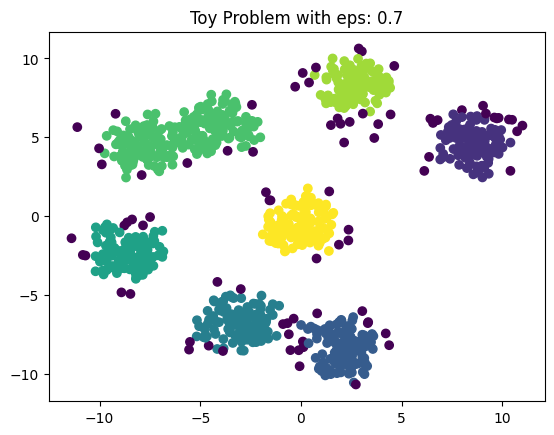

In [3]:
eps = [0.2,0.7]
for ep in eps:
    db = DBSCAN(eps=ep, min_samples=10, metric='euclidean')
    plt.scatter(X[:,0], X[:,1], c=db.fit_predict(X))
    plt.title('Toy Problem with eps: ' + str(ep))
    plt.show()

# Activity 4

1. Generate a random cluster dataset

In [4]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
X_blob, y_blob = make_blobs(n_samples=500, centers=4, n_features=2, random_state=800)

2. Visualize the data

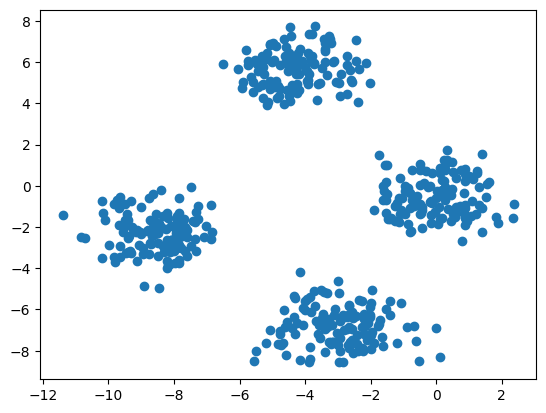

In [5]:
plt.scatter(X_blob[:,0], X_blob[:,1])
plt.show()

3. Create functions from scratch that allow you to call DBSCAN on a dataset

In [6]:
def scratch_DBSCAN(x, eps, min_pts):
    """
    param x (list of vectors): your dataset to be clustered
    param eps (float): neigborhood radius threshold
    param min_pts (int): minimum number of points threshold for a nieghborhood to be a cluster
    """
 
    # Build a label holder that is comprised of all 0s
    labels = [0]* x.shape[0]

    # Arbitrary starting "current cluster" ID    
    C = 0
    
    # For each point p in x...
    # ('p' is the index of the datapoint, rather than the datapoint itself.)
    for p in range(0, x.shape[0]):
    
        # Only unvisited points can be evaluated as neighborhood centers
        if not (labels[p] == 0):
            continue
        
        # Find all of p's neighbors.
        neighbors = neighborhood_search(x, p, eps)
        
        # If there are not enough neighbor points, then it is classified as noise (-1).
        # Otherwise we can use this point as a neighborhood cluster
        if len(neighbors) < min_pts:
            labels[p] = -1    
        else: 
            C += 1
            neighbor_cluster(x, labels, p, neighbors, C, eps, min_pts)
    
    return labels


def neighbor_cluster(x, labels, p, neighbors, C, eps, min_pts):

    # Assign the cluster label to original point
    labels[p] = C
    
    # Look at each neighbor of p (by index, not the points themselves) and evaluate
    i = 0
    while i < len(neighbors):    
        
        # Get the next point from the queue.        
        potential_neighbor_ix = neighbors[i]
       
        # If potential_neighbor_ix is noise from previous runs, we can assign it to current cluster
        if labels[potential_neighbor_ix] == -1:
            labels[potential_neighbor_ix] = C
        
        # Otherwise, if potential_neighbor_ix is unvisited, we can add it to current cluster
        elif labels[potential_neighbor_ix] == 0:
            labels[potential_neighbor_ix] = C
            
            # Further find neighbors of potential neighbor
            potential_neighbors_cluster = neighborhood_search(x, potential_neighbor_ix, eps)
            
            if len(potential_neighbors_cluster) >= min_pts:
                neighbors = neighbors + potential_neighbors_cluster      
        
        # Evaluate next neighbor
        i += 1        

def neighborhood_search(x, p, eps):
    neighbors = []
    
    # For each point in the dataset...
    for potential_neighbor in range(0, x.shape[0]):
        
        # If a nearby point falls below the neighborhood radius threshold, add to neighbors list
        if np.linalg.norm(x[p] - x[potential_neighbor]) < eps:
            neighbors.append(potential_neighbor)
            
    return neighbors


4. Use your created DBSCAN implementation to find clusters in the generated dataset. Feel free to use hyperparameters as you see fit, tuning them based on their performance

In [7]:
labels = scratch_DBSCAN(X_blob, 0.6, 5)

5. Visualize the clustering performance of your DBSCAN implementation from scratch

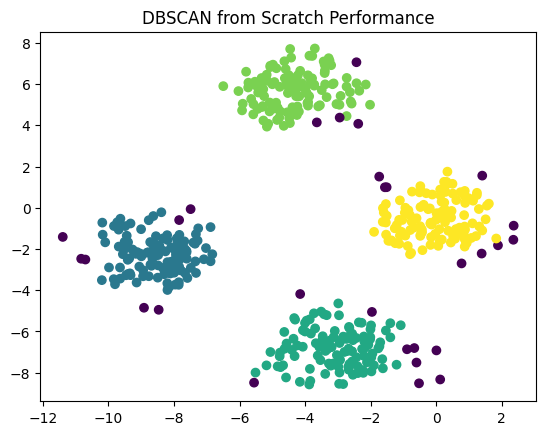

In [8]:
plt.scatter(X_blob[:,0], X_blob[:,1], c=labels)
plt.title("DBSCAN from Scratch Performance")
plt.show()

# Exercise 10: Evaluating the Impact of Minimum Points Threshold

1. Generate a random cluster dataset

In [9]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

X, y = make_blobs(n_samples=1000, centers=8, n_features=2, random_state=800)

2. Visualize the data

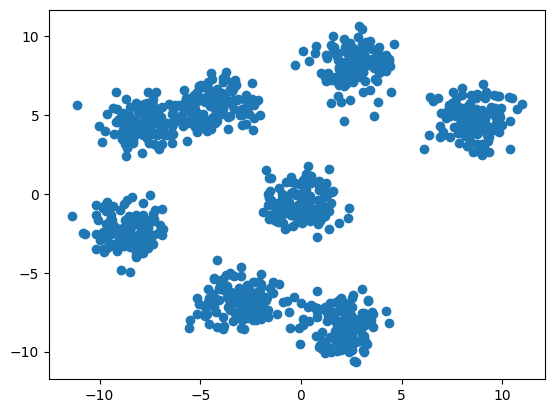

In [10]:
plt.scatter(X[:,0], X[:,1])
plt.show()

3. With the same plotted data as before, grab one of the better performing neighborhood radius sizes from Exercise 1, Evaluating the Impact of Neighborhood Radius Size – eps = 0.7

In [11]:
db = DBSCAN(eps=0.7, min_samples=10, metric='euclidean')

4. After instantiating the DBSCAN clustering algorithm, treat the min_samples hyperparameter as the variable we wish to tune. We can cycle through a loop to find which minimum number of points works best for our use case.

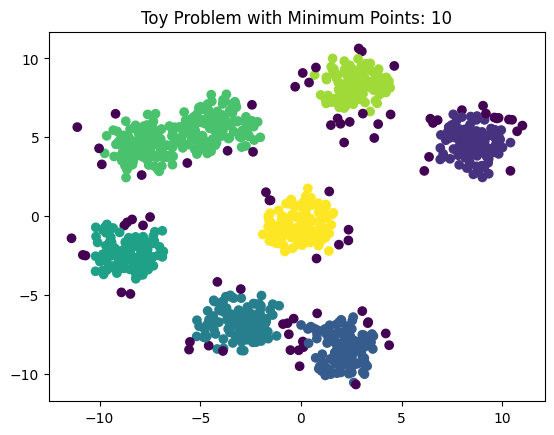

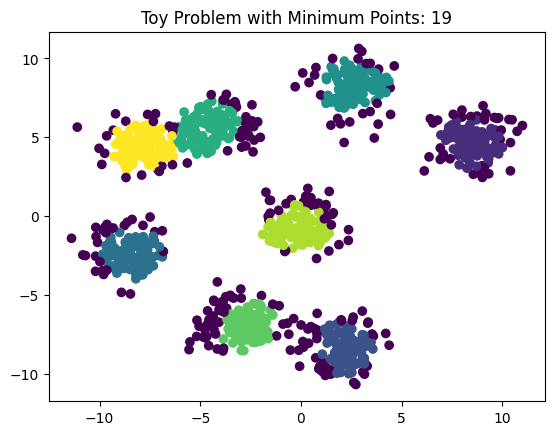

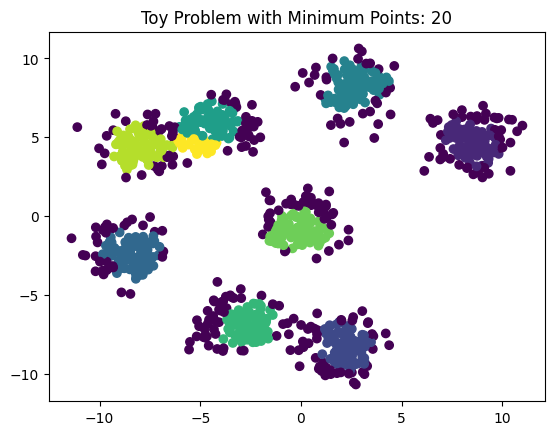

In [12]:
num_samples = [10,19,20]

for min_num in num_samples:
    db = DBSCAN(eps=0.7, min_samples=min_num, metric='euclidean')
    plt.scatter(X[:,0], X[:,1], c=db.fit_predict(X))
    plt.title('Toy Problem with Minimum Points: ' + str(min_num))
    plt.show()

# Activity 5: Comparing DBSCAN with k-means and Hierarchical Clustering

Using scikit-learn's implementation of DBSCAN,

1. Import the necessary packages

In [13]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

2. Load the wine dataset and check what the data looks like

In [14]:
wine_df = pd.read_csv("wine_data.csv")
print(wine_df.head())

   OD_read  Proline
0     3.92   1065.0
1     3.40   1050.0
2     3.17   1185.0
3     3.45   1480.0
4     2.93    735.0


3. Visualize the data

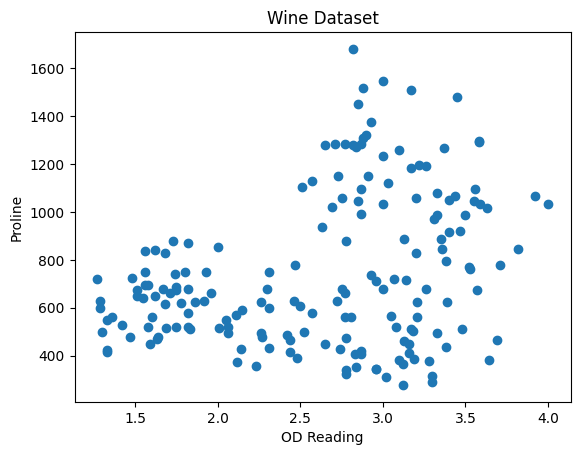

In [15]:
plt.scatter(wine_df.values[:,0], wine_df.values[:,1])
plt.title("Wine Dataset")
plt.xlabel("OD Reading")
plt.ylabel("Proline")
plt.show()

4. Generate clusters using k-means, agglomerative clustering, and DBSCAN

In [16]:
# km = KMeans(3)
# km_clusters = km.fit_predict(wine_df)

In [17]:
ac = AgglomerativeClustering(3, linkage='average')
ac_clusters = ac.fit_predict(wine_df)

5. Evaluate a few different options for DSBSCAN hyperparameters and their effect on the silhouette score

In [18]:
db_param_options = [[20,5],[25,5],[30,5],[25,7],[35,7],[35,3]]

for ep,min_sample in db_param_options:
    # Generate clusters using DBSCAN
    db = DBSCAN(eps=ep, min_samples = min_sample)
    db_clusters = db.fit_predict(wine_df)
    print("Eps: ", ep, "Min Samples: ", min_sample)
    print("DBSCAN Clustering: ", silhouette_score(wine_df, db_clusters))

Eps:  20 Min Samples:  5
DBSCAN Clustering:  0.3997987919957757
Eps:  25 Min Samples:  5
DBSCAN Clustering:  0.35258611037074095
Eps:  30 Min Samples:  5
DBSCAN Clustering:  0.43763797761597306
Eps:  25 Min Samples:  7
DBSCAN Clustering:  0.2711660466706248
Eps:  35 Min Samples:  7
DBSCAN Clustering:  0.4600630149335495
Eps:  35 Min Samples:  3
DBSCAN Clustering:  0.5368842164535846


6. Generate the final clusters based on the highest silhouette score

In [19]:
db = DBSCAN(eps=35, min_samples = 3)
db_clusters = db.fit_predict(wine_df)

7. Visualize clusters generated using each of the three methods

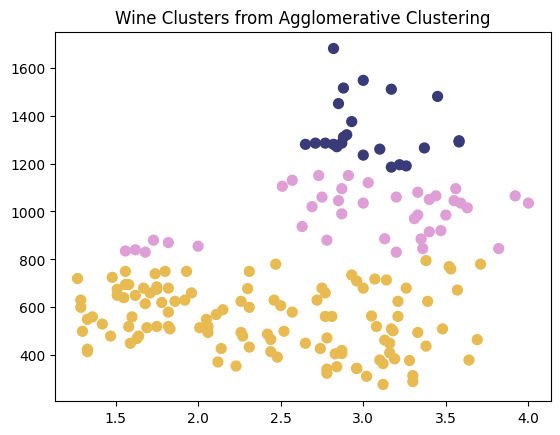

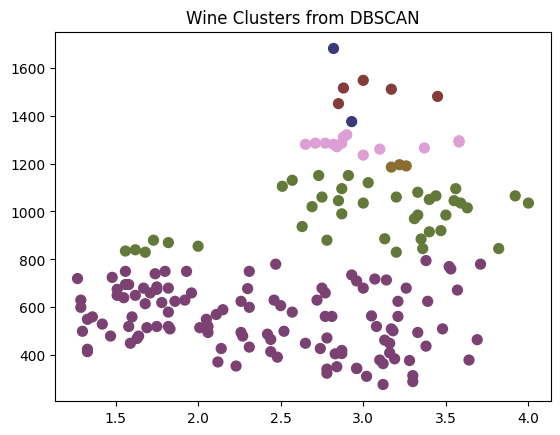

In [21]:
# plt.title("Wine Clusters from K-Means")
# plt.scatter(wine_df['OD_read'], wine_df['Proline'], c=km_clusters,s=50, cmap='tab20b')
# plt.show()

plt.title("Wine Clusters from Agglomerative Clustering")
plt.scatter(wine_df['OD_read'], wine_df['Proline'], c=ac_clusters,s=50, cmap='tab20b')
plt.show()

plt.title("Wine Clusters from DBSCAN")
plt.scatter(wine_df['OD_read'], wine_df['Proline'], c=db_clusters,s=50, cmap='tab20b')
plt.show()